# Processamento de arquivos texto para SWAT
Fornece um framework para processamento de dados em arquivos texto para geração de dados utilizados na calibração e validação com SWATCUP.
Este notebook mostra um passo a passo para abrir o arquivo de texto com Pandas, processar a data, o dado da variavel e gerar o arquivo de saída com os valores formatados para swatcup.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
import os

In [2]:
# Nome do arquivo de entrada e da coluna com a variavel
INPUT_FILE_NAME = './sb5_sedimentos_T_46830000.txt'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb8_sedimentos_T_46790000.txt'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb14_sedimentos_T_46902000.txt'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb21_sedimentos_T_46590000.txt'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb24_sedimentos_T_46550000.txt'    # Nome do arquivo de entrada
INPUT_FILE_NAME = './sb34_sedimentos_T_46415000.txt'    # Nome do arquivo de entrada

VARIABLE_COL = 'ConcentracaoMatSuspensao'    # Nome da coluna com os dados

# Configuracao de formatacao do arquivo de entrada
DELIMITER = ';'    # delimitator entre campos 
SKIP_ROWS = 10    # pula esse numero de linha antes de comercar a ler
ENCODING = 'iso-8859-1'    # Codificacao do arquivo. No Brasil o mais comum e iso-8859-1. Outro formato comum eh utf-8
DECIMAL = ','    # Caracter utilizado como decimal

# Gera nome do arquivo de saida a partir do de entrada. Geralmente não precisa ser alterado
path, filename = os.path.split(INPUT_FILE_NAME)
newfilename = 'swat_cal_val_{}'.format(filename)
OUTPUT_FILE_NAME = os.path.join(path, newfilename)    # Nome do arquivo de saida com dados processados para uso no SWAT
ID = filename    # Codigo identificador da estacao, para ser utilizano no comentario do dado. Serve para confirmar a origem do dado

# Periodo utilizado para calibracao (ano, mes, dia)
CALIBRATION_START_DATE = datetime.date(2003, 1, 1)
CALIBRATION_END_DATE = datetime.date(2011,12,31)
CALIBRATION_DESC = 'cal_({})'.format(ID)    # Descricao dos dados de calibracao

# Periodo utilizado para validacao
VALIDATION_START_DATE = datetime.date(2012, 1, 1)
VALIDATION_END_DATE =datetime.date(2016,12,31)
VALIDATION_DESC = 'val_({})'.format(ID)    # Descricao dos dados de calibracao

# Passo do modelo
# TODO: ainda nao esta implementado, por enquanto nao é utilizado
STEP = 'month'

## Le arquivo de entrada e transforma para formato interno

In [3]:
# Abre arquivo com pandas
df = pd.read_csv(INPUT_FILE_NAME, delimiter=DELIMITER, encoding=ENCODING, skiprows=SKIP_ROWS, index_col=False, decimal=DECIMAL)
df

,EstacaoCodigo,NivelConsistencia,Data,Hora,NumMedicao,DataLiq,HoraLiq,NumMedicaoLiq,Cota,Vazao,AreaMolhada,Largura,VelMedia,ConcentracaoMatSuspensao,CotaDeMedicao,TemperaturaDaAgua,ConcentracaoDaAmostraExtra,CondutividadeEletrica,Observacoes
0,46415000,1,28/05/2019,01/01/1900 10:57:00,1,28/05/2019,01/01/1900 09:13:00,163,56,14.200,42.400,38.04,0.336,2.800,61,23.85,NaN,16.70,NaN
1,46415000,1,01/04/2019,01/01/1900 11:45:00,27,01/04/2019,01/01/1900 10:08:00,162,88,30.500,47.800,38.30,0.639,7.100,88,NaN,NaN,34.50,NaN
2,46415000,1,23/01/2019,01/01/1900 11:26:00,26,23/01/2019,01/01/1900 09:00:00,161,57,14.500,42.500,38.40,0.341,4.100,57,NaN,NaN,25.60,NaN
3,46415000,1,21/08/2018,01/01/1900 11:08:00,25,21/08/2018,01/01/1900 09:48:00,160,54,11.897,38.660,36.41,0.308,3.900,54,NaN,NaN,21.90,NaN
4,46415000,1,23/04/2018,01/01/1900 10:52:00,24,23/04/2018,01/01/1900 10:05:00,159,72,22.989,44.645,33.36,0.515,2.500,72,NaN,NaN,17.04,NaN
5,46415000,1,25/01/2018,01/01/1900 11:18:00,23,25/01/2018,01/01/1900 09:56:00,157,60,15.111,42.516,36.53,0.355,14.200,60,NaN,NaN,NaN,NaN
6,46415000,1,23/11/2017,01/01/1900 11:43:00,22,23/11/2017,01/01/1900 11:15:00,156,76,25.454,48.546,35.35,0.524,5.800,76,NaN,NaN,20.40,NaN
7,46415000,1,09/06/2017,01/01/1900 13:10:00,21,09/06/2017,01/01/1900 12:13:00,155,55,12.783,40.201,35.73,0.318,1.900,55,22.80,NaN,53.90,NaN
8,46415000,1,28/11/2016,01/01/1900 12:09:00,22,28/11/2016,01/01/1900 10:50:00,153,73,18.359,46.605,39.00,0.394,5.400,73,28.00,NaN,18.50,NaN
9,46415000,1,08/09/2016,01/01/1900 11:53:00,21,08/09/2016,01/01/1900 10:20:00,152,55,10.300,40.100,36.50,0.256,3.100,55,25.20,0.000,12.30,NaN


In [4]:
# Converte coluna de data de texto para formato interno
date = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Separa os dados a serem utilizados
variable = df[VARIABLE_COL]
variable.index = date
variable = variable.sort_index() # Ordena pelo indice
variable


Data
2008-03-27     6.310
2008-08-13     5.780
2008-12-02     6.940
2009-07-06     3.830
2010-02-01     1.540
2010-04-20     4.661
2011-04-14     3.312
2011-10-14     2.744
2012-02-06     4.700
2012-07-13     1.300
2012-10-24     3.300
2013-04-17     7.500
2013-10-02     4.900
2013-12-04     0.830
2014-02-25     9.400
2014-06-24     3.400
2015-08-01     2.500
2015-12-03     3.300
2016-06-16     4.900
2016-09-08     3.100
2016-11-28     5.400
2017-06-09     1.900
2017-11-23     5.800
2018-01-25    14.200
2018-04-23     2.500
2018-08-21     3.900
2019-01-23     4.100
2019-04-01     7.100
2019-05-28     2.800
Name: ConcentracaoMatSuspensao, dtype: float64

## Visualização dos dados parar verificação

Text(0.5, 1.0, 'ConcentracaoMatSuspensao')

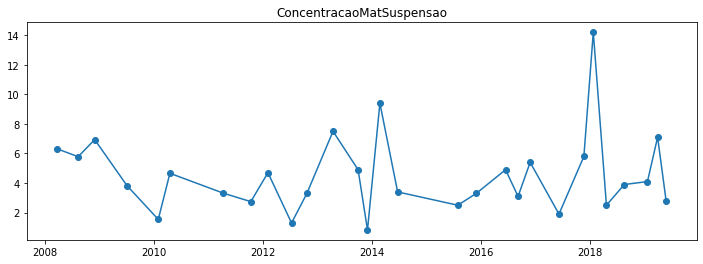

In [5]:
# Mostra gráfico para verificar se parece tudo ok
plt.figure(figsize=(12,4))
plt.plot(variable, marker='o' )
plt.title(VARIABLE_COL)

## Gera arquivo para SWAT

In [6]:
# Seleciona faixa de datas
calibration = pd.DataFrame(variable[CALIBRATION_START_DATE: CALIBRATION_END_DATE])
validation = pd.DataFrame(variable[VALIDATION_START_DATE: VALIDATION_END_DATE])

In [7]:
# Calcula steps e gera arquivo saida de calibração
calibration['step'] = -99
calibration['description'] = ''
for index, row in calibration.iterrows():
    year = index.year
    month = index.month
    day = index.day
    step = (year - CALIBRATION_START_DATE.year)*12 + (month - CALIBRATION_START_DATE.month) + 1
    #row['model_step'] = step
    calibration.loc[index, 'step'] = step
    calibration.loc[index, 'description'] = CALIBRATION_DESC + '_({}-{}-{})'.format(year,month,day)
    
calibration_out = calibration[['step', 'description',VARIABLE_COL]]
calibration_out.set_index('step', inplace=True)
print('Calibracao')
calibration_out

Calibracao


,description,ConcentracaoMatSuspensao
step,,
63,cal_(sb34_sedimentos_T_46415000.txt)_(2008-3-27),6.310
68,cal_(sb34_sedimentos_T_46415000.txt)_(2008-8-13),5.780
72,cal_(sb34_sedimentos_T_46415000.txt)_(2008-12-2),6.940
79,cal_(sb34_sedimentos_T_46415000.txt)_(2009-7-6),3.830
86,cal_(sb34_sedimentos_T_46415000.txt)_(2010-2-1),1.540
88,cal_(sb34_sedimentos_T_46415000.txt)_(2010-4-20),4.661
100,cal_(sb34_sedimentos_T_46415000.txt)_(2011-4-14),3.312
106,cal_(sb34_sedimentos_T_46415000.txt)_(2011-10-14),2.744


In [8]:
# Calcula steps e gera arquivo saida de validacao
validation['step'] = -99
validation['description'] = ''
for index, row in validation.iterrows():
    year = index.year
    month = index.month
    day = index.month
    step = (year - CALIBRATION_START_DATE.year)*12 + (month - VALIDATION_START_DATE.month) + 1
    validation.loc[index, 'step'] = step
    validation.loc[index, 'description'] = VALIDATION_DESC + '_({}-{}-{})'.format(year,month,day)
    
validation_out = validation[['step', 'description','ConcentracaoMatSuspensao']]
validation_out.set_index('step', inplace=True)
print('Validacao')
validation_out

Validacao


,description,ConcentracaoMatSuspensao
step,,
110,val_(sb34_sedimentos_T_46415000.txt)_(2012-2-2),4.70
115,val_(sb34_sedimentos_T_46415000.txt)_(2012-7-7),1.30
118,val_(sb34_sedimentos_T_46415000.txt)_(2012-10-10),3.30
124,val_(sb34_sedimentos_T_46415000.txt)_(2013-4-4),7.50
130,val_(sb34_sedimentos_T_46415000.txt)_(2013-10-10),4.90
132,val_(sb34_sedimentos_T_46415000.txt)_(2013-12-12),0.83
134,val_(sb34_sedimentos_T_46415000.txt)_(2014-2-2),9.40
138,val_(sb34_sedimentos_T_46415000.txt)_(2014-6-6),3.40
152,val_(sb34_sedimentos_T_46415000.txt)_(2015-8-8),2.50


In [9]:
# Gera arquivo com valores para calibracao e validacao
with open(OUTPUT_FILE_NAME, 'w') as fo:
    fo.write('Dados de calibracao/validacao para SWAT\n')
    fo.write('Arquivo de entrada: {}\n'.format(INPUT_FILE_NAME))
    fo.write('Arquivo de saida: {}\n'.format(OUTPUT_FILE_NAME))
    fo.write('Variavel: {}\n'.format(VARIABLE_COL))
    fo.write('Passo: {}\n'.format(STEP))
    
    fo.write('\n\n')

    fo.write('Calibracao\n')
    fo.write('Data inicial: {}\n'.format(CALIBRATION_START_DATE))
    fo.write('Data final: {}\n'.format(CALIBRATION_END_DATE))
    fo.write('Numero elementos: {}\n'.format(len(calibration_out.index)))
    calibration_out.to_csv(fo, sep=' ', line_terminator='\n')

    fo.write('\n\n')
    
    fo.write('Validacao\n')
    fo.write('Data inicial: {}\n'.format(VALIDATION_START_DATE))
    fo.write('Data final: {}\n'.format(VALIDATION_END_DATE))
    fo.write('Numero elementos: {}\n'.format(len(validation_out.index)))
    validation_out.to_csv(fo, sep=' ', line_terminator='\n')

    fo.write('\n\n')
    fo.write('Tudo\n')
    fo.write('Numero elementos: {}\n'.format(len(validation_out.index) + len(calibration_out.index)))
    calibration_out.to_csv(fo, sep=' ',line_terminator='\n')
    validation_out.to_csv(fo, sep=' ', header=None, line_terminator='\n')

    
print('Arquivo de saida: {}'.format(OUTPUT_FILE_NAME))

Arquivo de saida: .\swat_cal_val_sb34_sedimentos_T_46415000.txt
